<a name='0_0'></a>
# <span style="color:#ff5f27">👨🏻‍🏫 Data Analysis </span>

🗄️ Table of Contents:

- [📝 Imports](#0)
- [💽 Data Loading](#1)
- [👩🏻‍🔬 Feature Engineering](#2)
- [🧬 Data Exploration](#3)
- [👨🏻‍🎨 Data Visualization](#4)
- [🔮 RLE Bounding Boxes Visualization](#5)
- [👩🏻‍🔬 Data Preparation](#6)
    - [💣 Remove corrupted images](#60)
    - [⚖️ Balance Data](#61)
    - [🔪 Train/Test Split](#62)
- [⚙️ Image Generator](#7)
- [🧬 Data Augmentation](#8)


<a name='0'></a>
## <span style="color:#ff5f27">📝 Imports </span>
- [🗄️ Table of Contents](#0_0)

Let's import all necessary libraries and modules.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

from tools.visualization import *
from tools.dataset_generator import *

2023-11-20 15:57:33.740016: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<a name='1'></a>
## <span style="color:#ff5f27">💽 Data Loading </span>
- [🗄️ Table of Contents](#0_0)

Let's define the path variables to train and test folders which contain images.

In [2]:
TRAIN_DIR = 'data/train_v2'
TEST_DIR = 'data/test_v2'

In [3]:
# Get a list of file names in the train and test directories
train_names = os.listdir(TRAIN_DIR)
test_names = os.listdir(TEST_DIR)

# Print the number of train and test images
print(f'⛳️ Amount of train images: {len(train_names)}')
print(f'⛳️ Amount of test images: {len(test_names)}')

# Display the first 5 train image names
train_names[:5]

⛳️ Amount of train images: 192556
⛳️ Amount of test images: 15606


['db4d6ecd4.jpg',
 '4be1d7b76.jpg',
 '6961eaf60.jpg',
 'd0b573bd5.jpg',
 '2702aee48.jpg']

In [4]:
print(f'⛳️ Image Shape: {np.array(PIL.Image.open(f"{TRAIN_DIR}/{train_names[0]}")).shape}')

⛳️ Image Shape: (768, 768, 3)


In [5]:
# Read the CSV file containing ship segmentations
segmentations = pd.read_csv('data/train_ship_segmentations_v2.csv')

# Rename the columns for better readability
segmentations.columns = ['image_id', 'encoded_pixels']

# Print the shape (number of rows and columns) of the DataFrame
print(segmentations.shape)

# Display the first 3 rows of the DataFrame
segmentations.head(3)

(231723, 2)


image_id                                     encoded_pixels
0  00003e153.jpg                                                NaN
1  0001124c7.jpg                                                NaN
2  000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...

In [6]:
# Check for missing values (NaN) in the 'segmentations' DataFrame
missing_values = segmentations.isna().sum()

<a name='2'></a>
## <span style="color:#ff5f27"> 👩🏻‍🔬 Feature Engineering </span>
- [🗄️ Table of Contents](#0_0)

In [7]:
# Create a new column 'has_ship' based on the presence of non-null values in the 'encoded_pixels' column
segmentations['has_ship'] = segmentations.encoded_pixels.notnull()

# Display the first 3 rows of the updated DataFrame
segmentations.head(3)

image_id                                     encoded_pixels  has_ship
0  00003e153.jpg                                                NaN     False
1  0001124c7.jpg                                                NaN     False
2  000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...      True

In [8]:
# Group the 'segmentations' DataFrame by 'image_id' and count the occurrences of 'has_ship' for each image
ship_counts = segmentations.groupby('image_id')['has_ship'].agg('sum').reset_index()

# Rename the columns for better readability
ship_counts.columns = [ship_counts.columns[0], 'ship_count']

# Display the first 3 rows of the resulting DataFrame
ship_counts.head(3)

image_id  ship_count
0  00003e153.jpg           0
1  0001124c7.jpg           0
2  000155de5.jpg           1

<a name='3'></a>
## <span style="color:#ff5f27">🧬 Data Exploration </span>
- [🗄️ Table of Contents](#0_0)

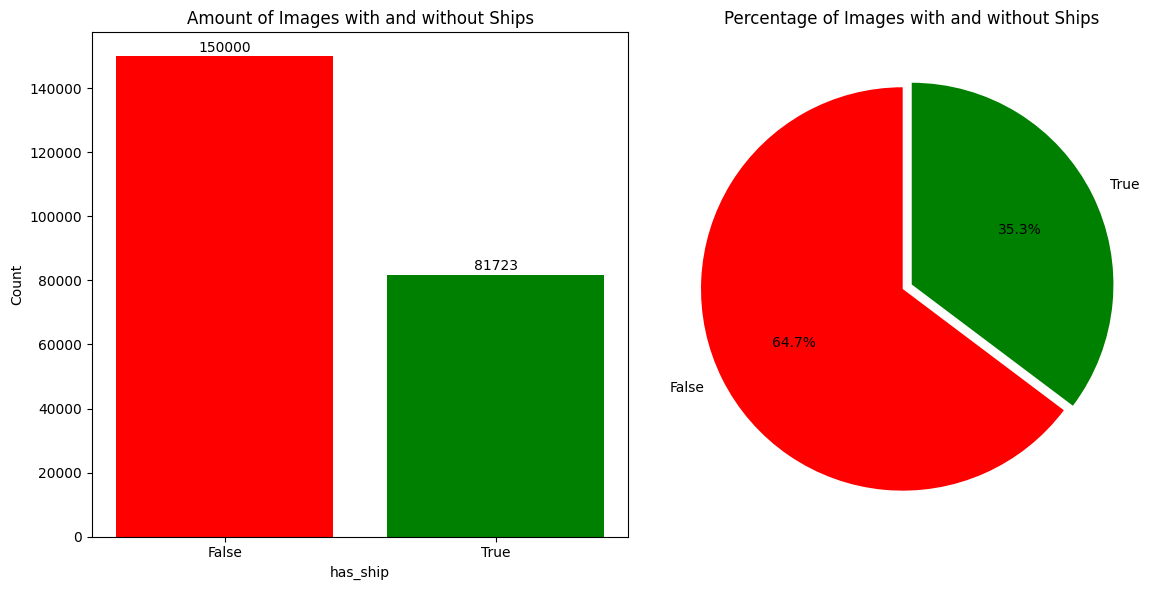

In [9]:
# Plot ship statistics
plot_ship_statistics(segmentations['has_ship'])

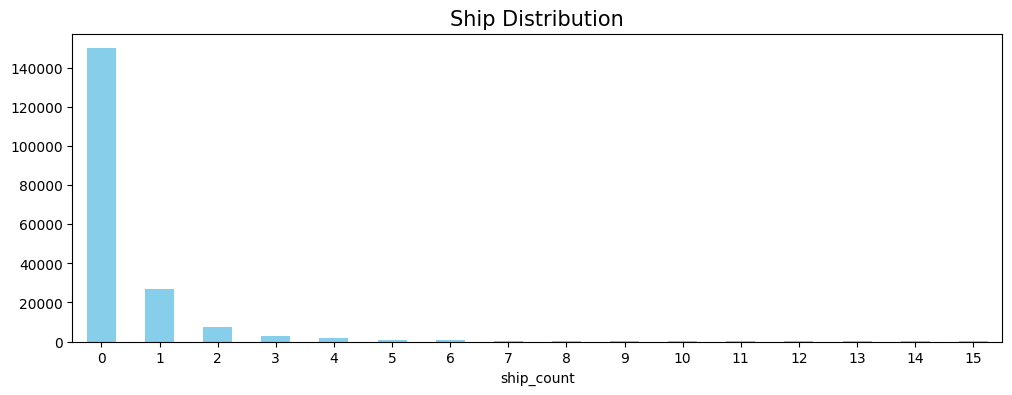

In [10]:
# Set the figure size for the plot
plt.figure(figsize=(12, 4))

# Count the occurrences of each ship count and plot a bar chart
ship_counts['ship_count'].value_counts().sort_index().plot(kind='bar', color='skyblue')

# Set the title of the plot
plt.title('Ship Distribution', fontsize=15)

# Set the x-axis ticks rotation to 0 degrees for better readability
plt.xticks(rotation=0)

# Display the plot
plt.show()

<a name='4'></a>
## <span style="color:#ff5f27">👨🏻‍🎨 Data Visualization </span>
- [🗄️ Table of Contents](#0_0)

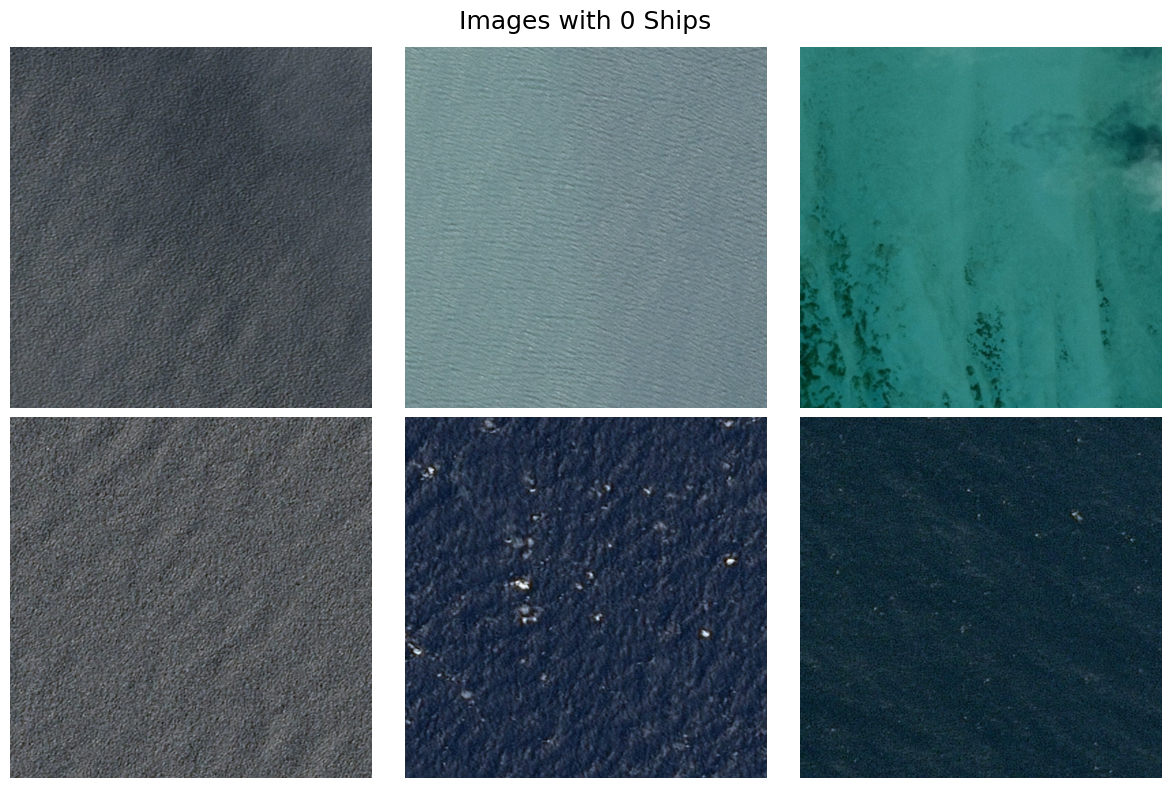

In [11]:
# Show images with no ships
show_n_ships(0, ship_counts, TRAIN_DIR)

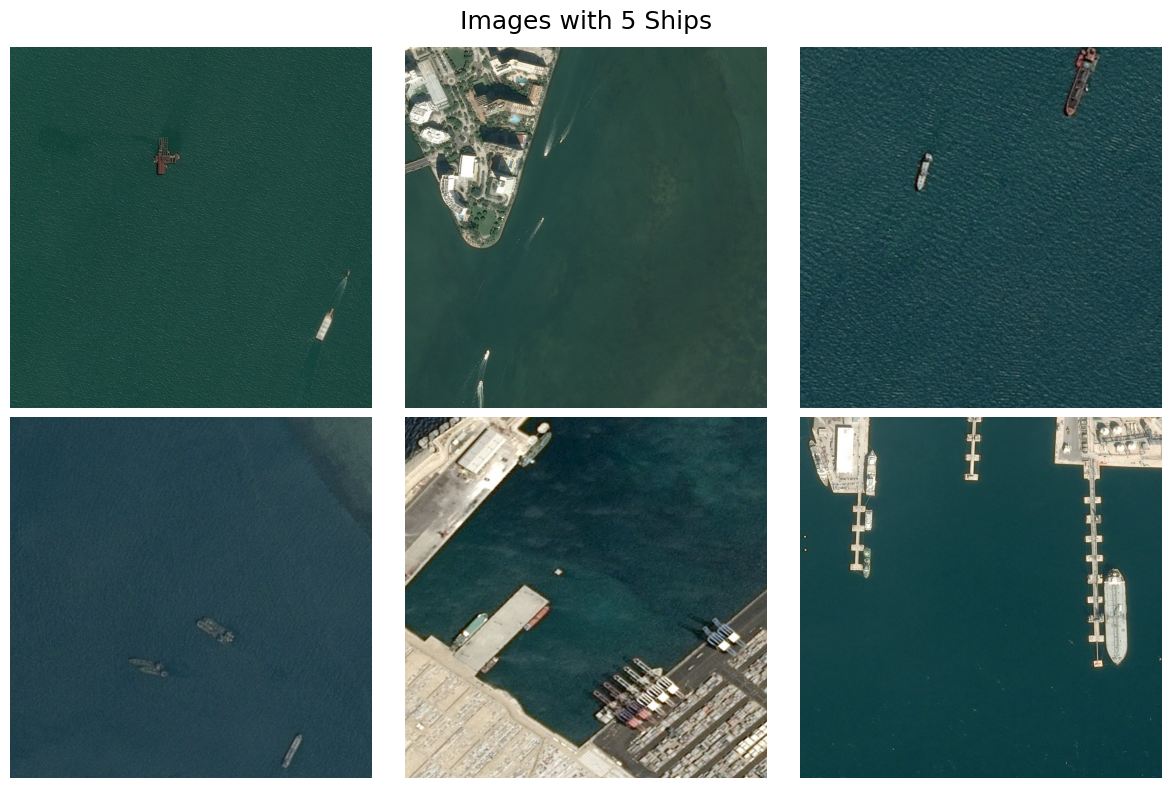

In [12]:
# Show images with 5 ships
show_n_ships(5, ship_counts, TRAIN_DIR)

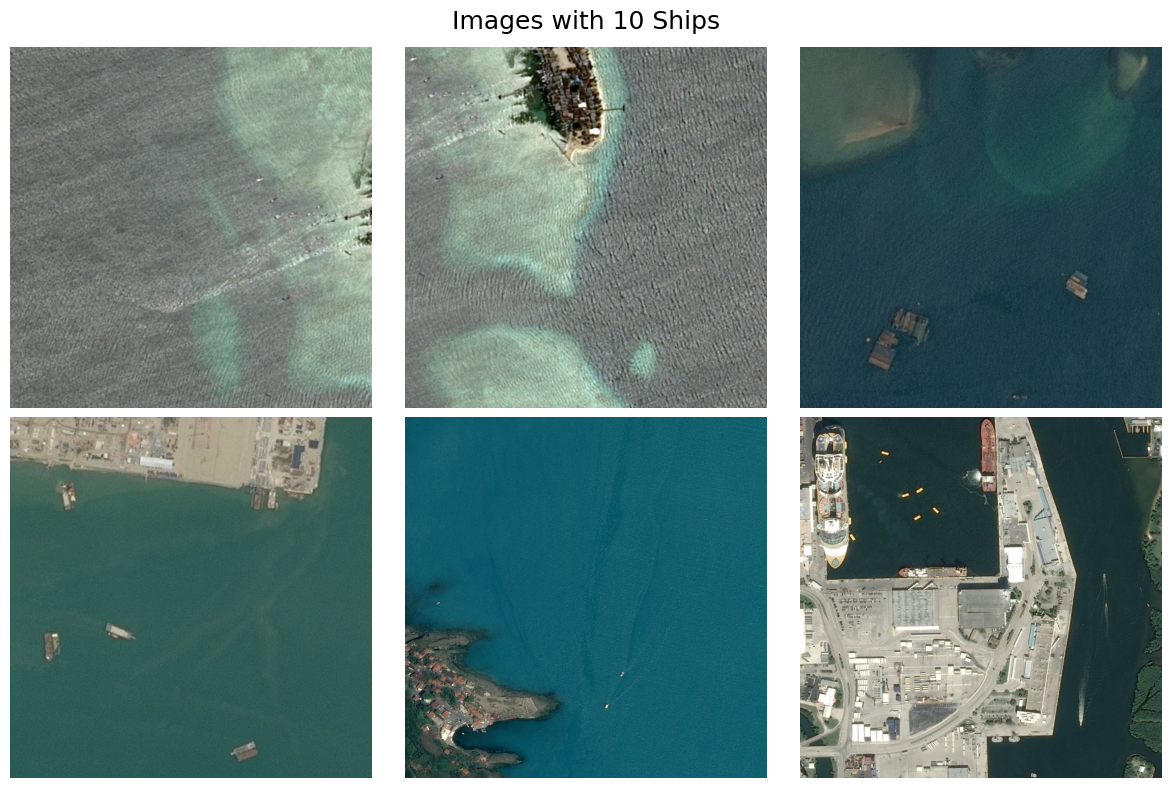

In [13]:
# Show images with 10 ships
show_n_ships(10, ship_counts, TRAIN_DIR)

<a name='5'></a>
## <span style="color:#ff5f27">🔮 RLE Bounding Boxes Visualization </span>
- [🗄️ Table of Contents](#0_0)

`RLE` - Run Length Encoding. 

The encoded string is structured as a sequence of pairs, with **each pair representing a line**. Each pair consists of a starting position (start) and the length of the line (length). 

The line is drawn by extending from the specified starting position for the given length in pixels. This pattern repeats throughout the encoded string.

⛳️ Image name: b4cba6fc6.jpg
⛳️ Amount of ships: 0


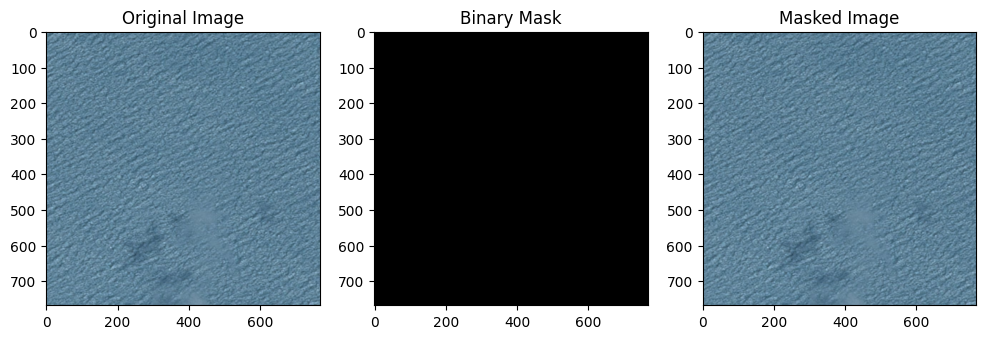

In [14]:
# Define the amount of ships to be present on the image
ships_amount = 0

# Plot original image, object mask, and a combination of image and mask
plot_n_ship_image_mask(
    ships_amount,
    ship_counts,
    segmentations,
    TRAIN_DIR,
)

⛳️ Image name: 6879587b5.jpg
⛳️ Amount of ships: 3


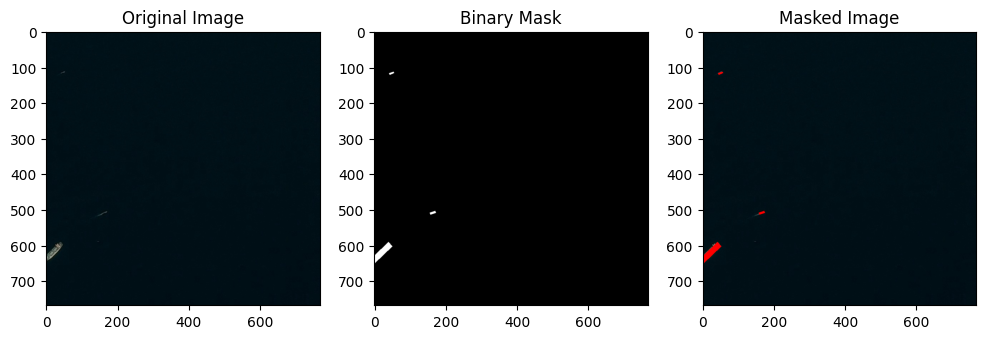

In [15]:
# Define the amount of ships to be present on the image
ships_amount = 3

# Plot original image, object mask, and a combination of image and mask
plot_n_ship_image_mask(
    ships_amount, 
    ship_counts, 
    segmentations,
    TRAIN_DIR,
)

⛳️ Image name: 8f146e0e2.jpg
⛳️ Amount of ships: 5


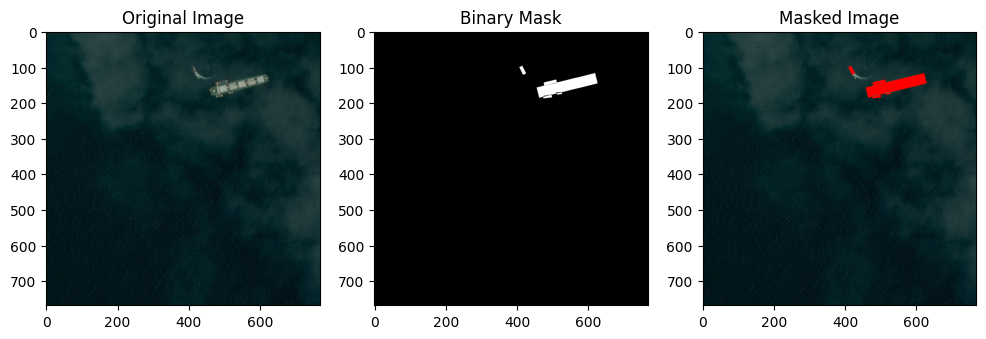

In [16]:
# Define the amount of ships to be present on the image
ships_amount = 5

# Plot original image, object mask, and a combination of image and mask
plot_n_ship_image_mask(
    ships_amount, 
    ship_counts, 
    segmentations,
    TRAIN_DIR,
)

⛳️ Image name: 082c2c064.jpg
⛳️ Amount of ships: 10


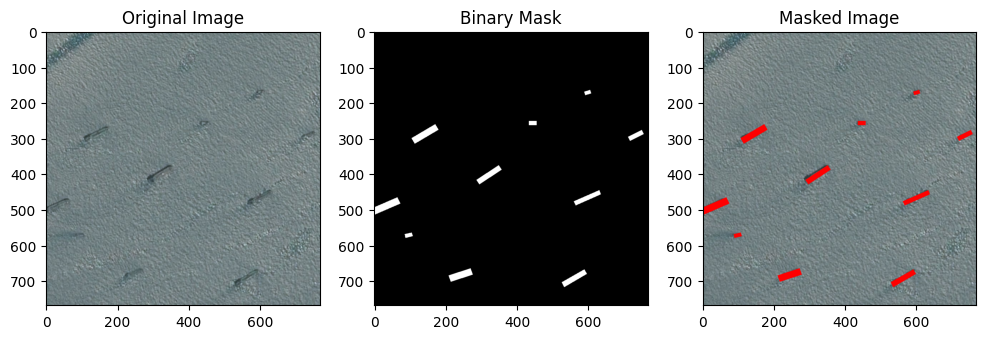

In [17]:
# Define the amount of ships to be present on the image
ships_amount = 10

# Plot original image, object mask, and a combination of image and mask
plot_n_ship_image_mask(
    ships_amount, 
    ship_counts, 
    segmentations,
    TRAIN_DIR,
)

⛳️ Image name: f7e6819bb.jpg
⛳️ Amount of ships: 15


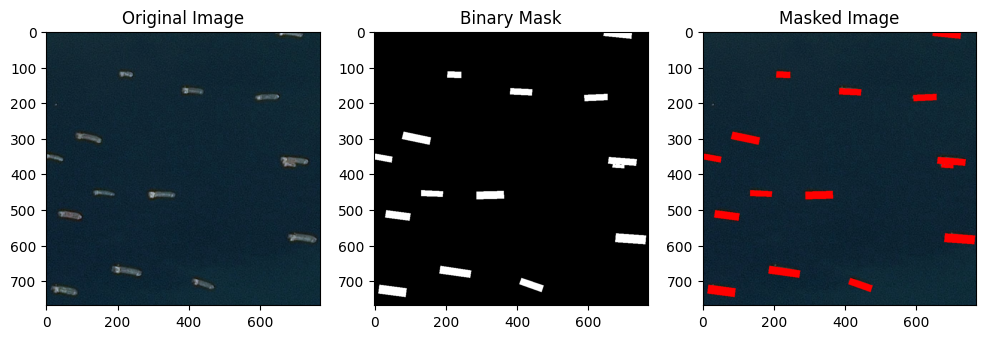

In [18]:
# Define the amount of ships to be present on the image
ships_amount = 15

# Plot original image, object mask, and a combination of image and mask
plot_n_ship_image_mask(
    ships_amount, 
    ship_counts, 
    segmentations,
    TRAIN_DIR,
)

<a name='6'></a>
## <span style="color:#ff5f27">👩🏻‍🔬 Data Preparation</span>
- [🗄️ Table of Contents](#0_0)

In [19]:
# Display the first 3 rows of the 'segmentations' DataFrame
segmentations.head(3)

image_id                                     encoded_pixels  has_ship
0  00003e153.jpg                                                NaN     False
1  0001124c7.jpg                                                NaN     False
2  000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...      True

In [20]:
# Display the first 3 rows of the 'ship_counts' DataFrame
ship_counts.head(3)

image_id  ship_count
0  00003e153.jpg           0
1  0001124c7.jpg           0
2  000155de5.jpg           1

<a name='60'></a>
### <span style="color:#ff5f27">💣 Remove corrupted images</span>
- [🗄️ Table of Contents](#0_0)

In [21]:
# Print the shape of 'ship_counts' DataFrame before filtering
print(f'⛳️ Shape before filtering: {ship_counts.shape}')

# Calculate and add a new column 'file_size_kb' representing the file size in kilobytes for each image
ship_counts['file_size_kb'] = ship_counts['image_id'].map(
    lambda c_img_id: os.stat(os.path.join(TRAIN_DIR, c_img_id)).st_size / 1024)

# Filter out images with a file size less than or equal to 50 KB
ship_counts = ship_counts[ship_counts['file_size_kb'] > 50]

# Print the shape of 'ship_counts' DataFrame after filtering
print(f'⛳️ Shape after filtering: {ship_counts.shape}')

# Display the first 3 rows of the updated DataFrame
ship_counts.head(3)

⛳️ Shape before filtering: (192556, 2)
⛳️ Shape after filtering: (191289, 3)


image_id  ship_count  file_size_kb
0  00003e153.jpg           0    128.944336
1  0001124c7.jpg           0     76.059570
2  000155de5.jpg           1    147.625977

In [22]:
# Merge the 'segmentations' and 'ship_counts' DataFrames based on the 'image_id' column
data_merged = pd.merge(segmentations, ship_counts)

# Display the first 3 rows of the merged DataFrame
data_merged.head(3)

image_id                                     encoded_pixels  has_ship  \
0  00003e153.jpg                                                NaN     False   
1  0001124c7.jpg                                                NaN     False   
2  000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...      True   

   ship_count  file_size_kb  
0           0    128.944336  
1           0     76.059570  
2           1    147.625977

<a name='61'></a>
### <span style="color:#ff5f27">⚖️ Balance Data</span>
- [🗄️ Table of Contents](#0_0)

As you can see data is inbalanced. Let's fix this.

In [23]:
# Calculate the distribution of ship counts in the merged DataFrame
ship_distribution = data_merged['ship_count'].value_counts()

# Display the ship count distribution
ship_distribution

ship_count
0     149293
1      26737
2      15126
3       8724
4       6432
5       4585
6       3912
7       2835
8       2512
9       2169
10      1680
11      1584
12      1464
14      1064
15       990
13       975
Name: count, dtype: int64

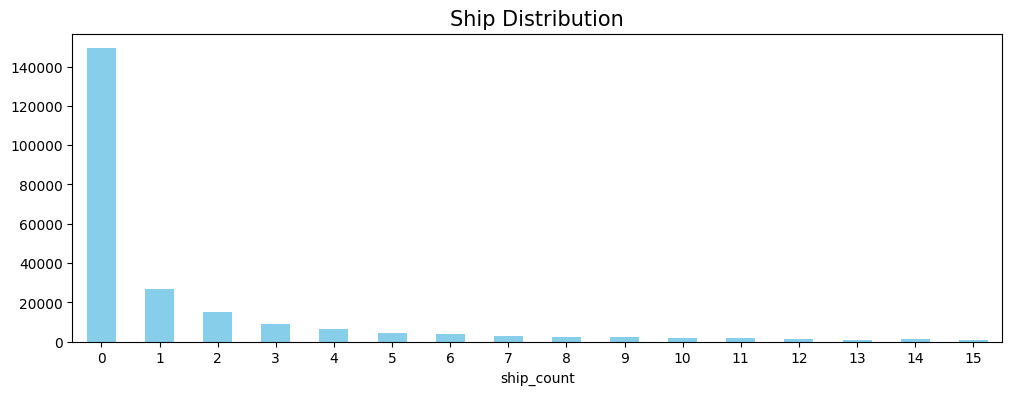

In [24]:
# Set the figure size for the plot
plt.figure(figsize=(12, 4))

# Plot the ship count distribution as a bar chart
ship_distribution.sort_index().plot(kind='bar', color='skyblue')

# Set the title of the plot
plt.title('Ship Distribution', fontsize=15)

# Set the x-axis ticks rotation to 0 degrees for better readability
plt.xticks(rotation=0)

# Display the plot
plt.show()

In [25]:
# Define the desired number of samples per ship count group
SAMPLES_PER_GROUP = 8000

# Balance the data by sampling from each ship count group
data_merged_balanced = data_merged.groupby('ship_count').apply(
    lambda x: x.sample(SAMPLES_PER_GROUP) 
    if len(x) > SAMPLES_PER_GROUP 
    else x
).reset_index(drop=True)

# Display the balanced DataFrame
data_merged_balanced

image_id                                     encoded_pixels  \
0      1e56d3e9b.jpg                                                NaN   
1      b205ad731.jpg                                                NaN   
2      2e078ad54.jpg                                                NaN   
3      cf66abe2f.jpg                                                NaN   
4      1f6c6ee44.jpg                                                NaN   
...              ...                                                ...   
62197  ff7ac7f3c.jpg  452546 1 453313 3 454079 5 454846 7 455613 9 4...   
62198  ff7ac7f3c.jpg  73142 1 73909 4 74676 6 75443 8 76212 9 76981 ...   
62199  ff7ac7f3c.jpg  357792 2 358558 4 359324 7 360092 7 360861 6 3...   
62200  ff7ac7f3c.jpg  327886 1 328652 4 329419 6 330188 5 330957 5 3...   
62201  ff7ac7f3c.jpg  361459 2 362224 5 362989 9 363754 12 364520 15...   

       has_ship  ship_count  file_size_kb  
0         False           0    178.654297  
1         False           0     77.154297  
2         False           0    117.139648  
3         False           0    127.029297  
4         False           0    113.470703  
...         ...         ...           ...  
62197      True          15    198.810547  
62198      True          15    198.810547  
62199      True          15    198.810547  
62200      True          15    198.810547  
62201      True          15    198.810547  

[62202 rows x 5 columns]

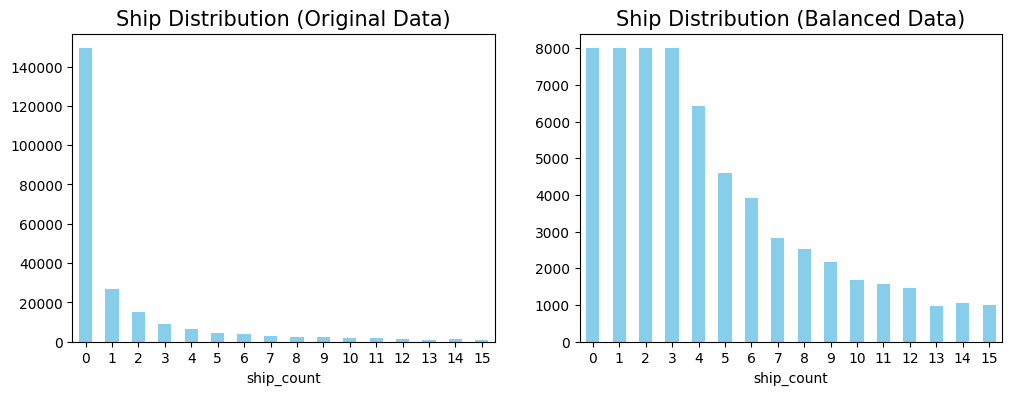

In [26]:
# Create a subplot with 1 row and 2 columns, setting the figure size
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot the ship count distribution for the original data in the first subplot
ship_distribution.sort_index().plot(
    kind='bar', 
    color='skyblue', 
    ax=ax[0],
)

# Plot the ship count distribution for the balanced data in the second subplot
data_merged_balanced.ship_count.value_counts().sort_index().plot(
    kind='bar', 
    color='skyblue', 
    ax=ax[1],
)

# Set titles for the subplots
ax[0].set_title('Ship Distribution (Original Data)', fontsize=15)
ax[1].set_title('Ship Distribution (Balanced Data)', fontsize=15)

# Set x-axis tick labels to be horizontally aligned for both subplots
for a in ax:
    a.set_xticklabels(a.get_xticklabels(), rotation=0)

# Display the subplots
plt.show()

<a name='62'></a>
### <span style="color:#ff5f27">🔪 Train/Test Split</span>
- [🗄️ Table of Contents](#0_0)

In [27]:
# Split the balanced data into training and validation sets
train_df, valid_df = train_test_split(
    data_merged_balanced,
    test_size=0.01,
    stratify=data_merged_balanced['ship_count'],
)

# Print the shapes of the training and validation sets
print(f'⛳️ Train shape: {train_df.shape}')
print(f'⛳️ Validation shape: {valid_df.shape}')

# Display the first 3 rows of the training set
train_df.head(3)

⛳️ Train shape: (61579, 5)
⛳️ Validation shape: (623, 5)


image_id                                     encoded_pixels  \
37282  d4ab2c39d.jpg  448492 5 449252 13 450012 21 450775 26 451543 ...   
2900   a9ec67262.jpg                                                NaN   
42836  f59fea16a.jpg  477646 1 478412 3 479176 7 479940 12 480705 15...   

       has_ship  ship_count  file_size_kb  
37282      True           4    105.963867  
2900      False           0    144.703125  
42836      True           5     61.092773

<a name='7'></a>
## <span style="color:#ff5f27">⚙️ Image Generator</span>
- [🗄️ Table of Contents](#0_0)

In [28]:
# Define the batch size for training
BATCH_SIZE = 64

# Define the shape of the input images
IMAGE_SHAPE = (64, 64)

In [29]:
# Generate a training image data generator
train_generator = get_image_generator(train_df, BATCH_SIZE, IMAGE_SHAPE, TRAIN_DIR) 

# Get a batch of training data
X_train, y_train = next(train_generator)

# Print the shapes of the training data
print(f'⛳️ X_train shape: {X_train.shape}')
print(f'⛳️ y_train shape: {y_train.shape}')

⛳️ X_train shape: (64, 64, 64, 3)
⛳️ y_train shape: (64, 64, 64, 1)


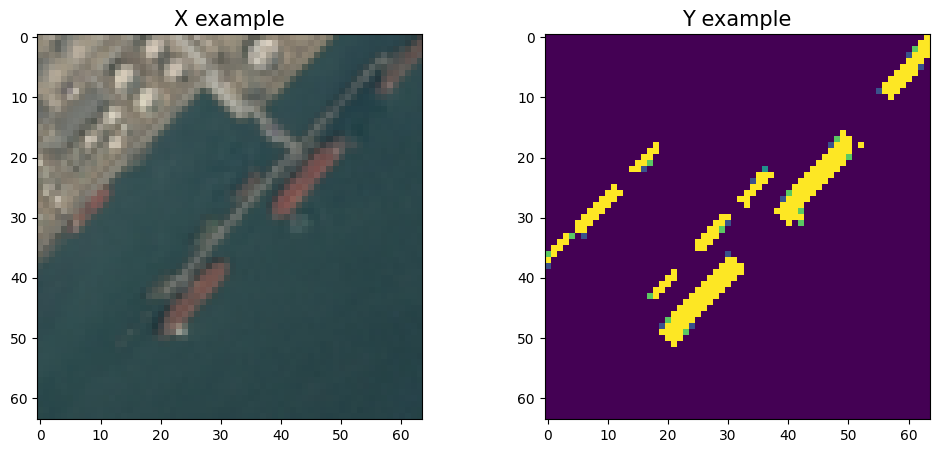

In [30]:
# Create a subplot with 1 row and 2 columns, setting the figure size
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Display the first image from the training batch in the first subplot
ax[0].imshow(X_train[0])
# Display the corresponding label (ground truth) from the training batch in the second subplot
ax[1].imshow(y_train[0])

# Set titles for the subplots
ax[0].set_title('X example', fontsize=15)
ax[1].set_title('Y example', fontsize=15)

# Display the subplots
plt.show()

In [31]:
# Generate a validation image data generator and get a batch of validation data
X_val, y_val = next(get_image_generator(valid_df, valid_df.shape[0], IMAGE_SHAPE, TRAIN_DIR))

# Print the shape of the input images for validation
print(f'⛳️ X_val shape: {X_val.shape}')

⛳️ X_val shape: (623, 64, 64, 3)


<a name='8'></a>
## <span style="color:#ff5f27">🧬 Data Augmentation</span>
- [🗄️ Table of Contents](#0_0)

In [32]:
# Define the augmentation parameters
generator_args = dict(
    rotation_range=20,         # Degree range for random rotations
    width_shift_range=0.1,     # Fraction of total width for random horizontal shifts
    height_shift_range=0.1,    # Fraction of total height for random vertical shifts
    zoom_range=0.05,           # Range for random zoom
    horizontal_flip=True,      # Randomly flip inputs horizontally
    vertical_flip=True,        # Randomly flip inputs vertically
    data_format='channels_last',  # Image data format ('channels_last' for (batch, height, width, channels))
)

# Create ImageDataGenerator instances for input images and labels separately
X_generator = ImageDataGenerator(**generator_args)  # For input images
y_generator = ImageDataGenerator(**generator_args)  # For labels (ground truth)

In [33]:
# Augment the training data using the custom augment function
train_augmented = augment(train_generator, X_generator, y_generator)

# Get a batch of augmented training data
t_X, t_y = next(train_augmented)

# Print the shapes of the augmented training data
print(f'⛳️ X_train shape: {t_X.shape}')
print(f'⛳️ y_train shape: {t_y.shape}')

⛳️ X_train shape: (64, 64, 64, 3)
⛳️ y_train shape: (64, 64, 64, 1)


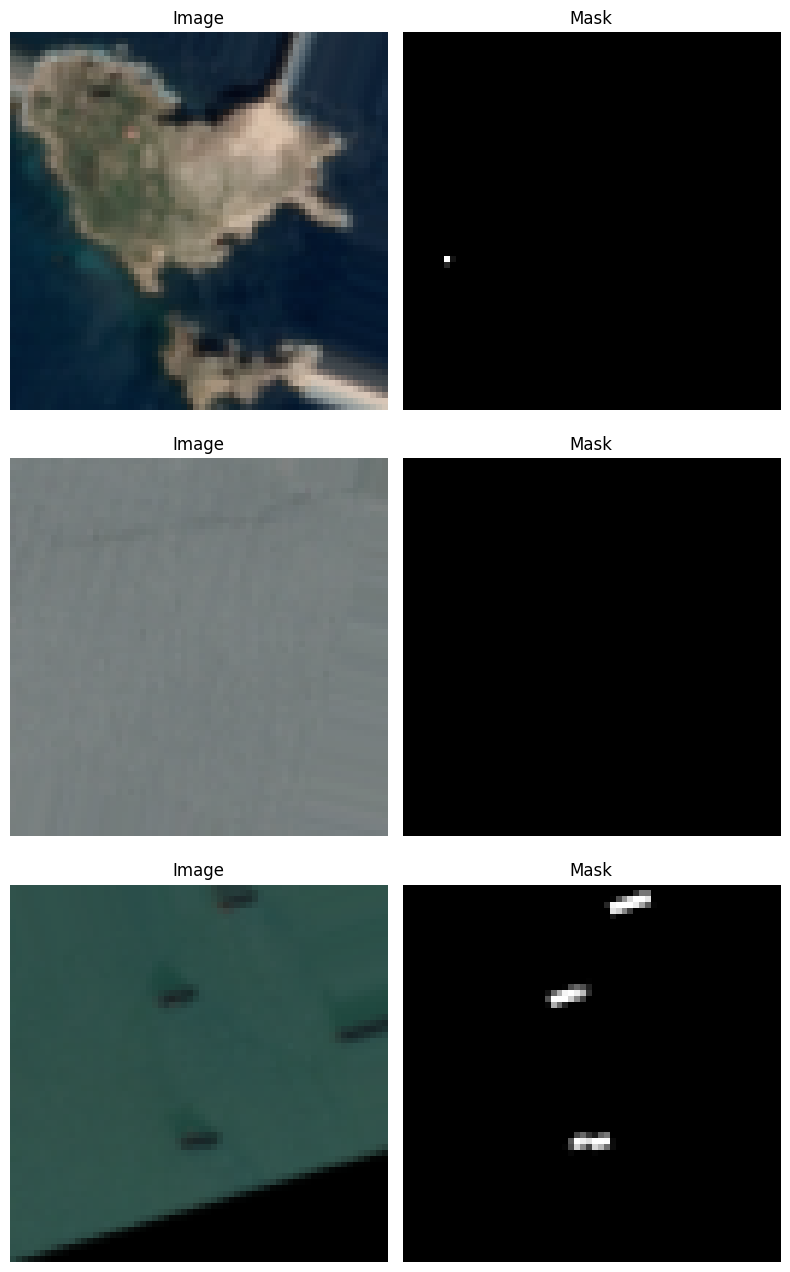

In [34]:
# Number of rows in the subplot grid
num_rows = 3  

# Create a subplot grid with 'num_rows' rows and 2 columns, setting the figure size
fig, axs = plt.subplots(num_rows, 2, figsize=(8, 13))

for i in range(num_rows):
    # Plot images from t_X in the first column
    axs[i, 0].imshow(t_X[i])  # Display the augmented input image
    axs[i, 0].set_title('Image')  # Set the title for the first column
    axs[i, 0].axis('off')  # Turn off axis ticks and labels

    # Plot images from t_y in the second column
    axs[i, 1].imshow(t_y[i].squeeze(), cmap='gray')  # Display the corresponding augmented label (ground truth)
    axs[i, 1].set_title('Mask')  # Set the title for the second column
    axs[i, 1].axis('off')  # Turn off axis ticks and labels

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Display the subplot grid
plt.show()

- [🗄️ Table of Contents](#0_0)
---